In [2]:
# %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
infile = pd.read_csv("Combined_Cities.csv")
df = pd.DataFrame(infile)

In [4]:
df.head(2)

,Bus Distance (miles),Closest Store,Driving Distance (miles),Location,Percent in Poverty,Poverty Groups,School Name,Store Address,Walking Distance (miles),Zip Code,Food Desert
0,1.4,Fiesta Mart,1.4,Dallas,97.13,90-100,William M Anderson Elementary,"10121 E Lake June Rd, Dallas, TX 75217",1.2,75217.0,Yes
1,0.9,Supermercado Monterrey,0.9,Dallas,96.33,90-100,Arcadia Park Elementary School,"5306 W Davis St, Dallas, TX 75211",0.9,75211.0,No


# Is driving distance correlated to poverty level?

In [237]:
# Correlation between the driving distance and the poverty level
# This is so small that it's negligible

driving_distance.corr(poverty_level)

0.0036589292969827127

# Mean vs. Median Driving Distance


In [5]:
df.groupby("Location").agg({"Driving Distance (miles)": "mean"})

,Driving Distance (miles)
Location,
Austin,1.435
Dallas,1.440
Laredo,1.548


In [6]:
df.groupby("Location").agg({"Driving Distance (miles)": "median"})

,Driving Distance (miles)
Location,
Austin,1.3
Dallas,1.2
Laredo,0.9


# Mean vs. Median Percent in Poverty

In [16]:
df.groupby("Location").agg({"Percent in Poverty": "mean"})

,Percent in Poverty
Location,
Austin,80.918500
Dallas,90.397429
Laredo,100.000000


In [17]:
df.groupby("Location").agg({"Percent in Poverty": "median"})

,Percent in Poverty
Location,
Austin,89.765
Dallas,92.930
Laredo,100.000


In [8]:
# This cross tabulation shows how many schools in each city fall into a food desert

food_desert_crosstab = pd.crosstab(df["Location"], df["Food Desert"], margins = True)

In [26]:
food_desert_crosstab

Food Desert,No,Yes,All
Location,,,
Austin,21,39,60
Dallas,57,83,140
Laredo,14,6,20
All,92,128,220


In [9]:
# Displaying it without margins

food_desert_crosstab_no_margin = pd.crosstab(df["Location"], df["Food Desert"])

In [10]:
food_desert_crosstab_no_margin

Food Desert,No,Yes
Location,,
Austin,21,39
Dallas,57,83
Laredo,14,6


In [30]:
# Using numbers above

percent_in_food_desert = 128/220
percent_Dallas = 83/140
percent_Austin = 39/60
percent_Laredo = 6/20

In [34]:
# A crude way to display likelihoods

print(f"Likelihood overall that a poor neighborhood is in a food desert: {percent_in_food_desert}")
print(f"Likelihood in Austin: {percent_Austin}")
print(f"Likelihood in Dallas: {percent_Dallas}")
print(f"Likelihood in Laredo: {percent_Laredo}")

Likelihood overall that a poor neighborhood is in a food desert: 0.5818181818181818
Likelihood in Austin: 0.65
Likelihood in Dallas: 0.5928571428571429
Likelihood in Laredo: 0.3


In [36]:
# Figures from the U.S. Census Bureau, estimated for 2018

Dallas_pop_2018 = 1345057
Austin_pop_2018 = 964254
Laredo_pop_2018 = 261639

In [161]:
# Population of the three cities

cities_pop = Dallas_pop_2018 + Austin_pop_2018 + Laredo_pop_2018
cities_pop

2570950

In [39]:
# Dallas is 1.4 times the size of Austin

Dallas_pop_2018/Austin_pop_2018

1.3949198032883452

In [40]:
Dallas_food_deserts = 83
Austin_food_deserts = 39
Laredo_food_deserts = 6

In [41]:
# Dallas has 2.13 times as many food deserts as Austin

Dallas_food_deserts/Austin_food_deserts

2.128205128205128

In [42]:
# Dallas is 5.14 times as large as Laredo

Dallas_pop_2018/Laredo_pop_2018

5.140888781871205

In [43]:
# Dallas has 13.83 times as many food deserts -- CRAZY
# It feels like there should be some way to graph this information 

Dallas_food_deserts/Laredo_food_deserts

13.833333333333334

In [162]:
# Looking at bins by city, it's quickly apparent that Austin has the greatest range
# and Dallas has the greatest number in poverty

pd.crosstab(df["Location"], df["Poverty Groups"])

Poverty Groups,40-49,50-59,60-69,70-79,80-89,90-100,< 40
Location,,,,,,,
Austin,5,1,5,7,9,32,1
Dallas,0,3,3,7,24,103,0
Laredo,0,0,0,0,0,20,0


Location
Austin    AxesSubplot(0.125,0.125;0.775x0.755)
Dallas    AxesSubplot(0.125,0.125;0.775x0.755)
Laredo    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Percent in Poverty, dtype: object

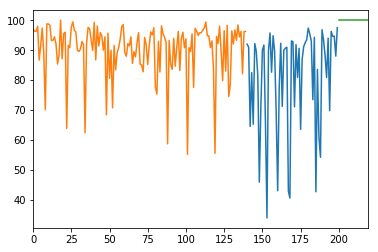

In [118]:
# Another way to see the range in poverty level and volume (width) of schools
# Austin is in blue, Dallas in orange, Laredo in green

df.groupby("Location")["Percent in Poverty"].plot()

In [121]:
pov_groups_ct = pd.crosstab(df["Location"], df["Poverty Groups"])

In [122]:
pov_groups_ct

Poverty Groups,40-49,50-59,60-69,70-79,80-89,90-100,< 40
Location,,,,,,,
Austin,5,1,5,7,9,32,1
Dallas,0,3,3,7,24,103,0
Laredo,0,0,0,0,0,20,0


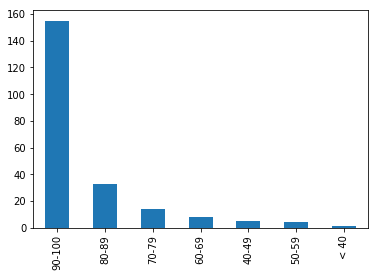

In [126]:
# A quick look at the poverty bins -- most of the schools in our dataset are in the
# 90-100% range

# This would be a decent graphic if we stacked the bars colors for each cityd

df["Poverty Groups"].value_counts().plot(kind = "bar")

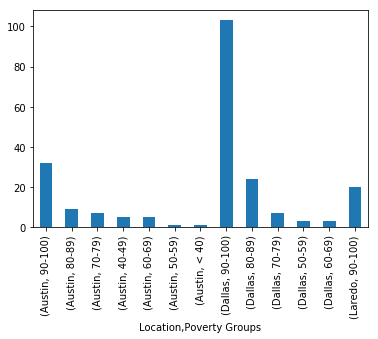

In [127]:
# Interesting in how we suddenly see Dallas as the biggest contributor of poorest groups

df.groupby("Location")["Poverty Groups"].value_counts().plot(kind = "bar")

In [133]:
# This takes the crosstab above and turns each row (axis = 0) into percentages that
# sum to one to normalize the data (make all bars in the chart below the same height)

food_desert_pct = food_desert_no_margins.div(food_desert_no_margins.sum(1).astype(float), 
                                           axis = 0)

In [134]:
food_desert_pct

Food Desert,No,Yes
Location,,
Austin,0.350000,0.650000
Dallas,0.407143,0.592857
Laredo,0.700000,0.300000


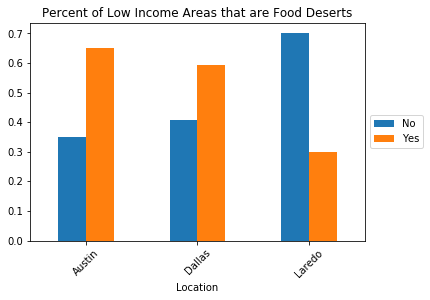

In [487]:
# Percent of Locations that are Food Deserts

food_desert_pct.plot(kind = 'bar', title = 'Percent of Low Income Areas that are Food Deserts', 
                     legend = False, rot = 45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

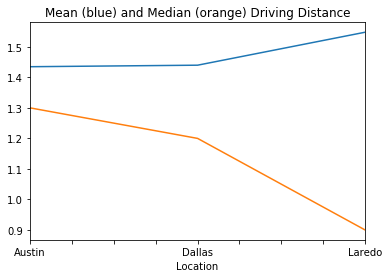

In [193]:
# Looks like we have one or two outliers in Laredo that push its mean up on driving distance
# A legend would be better than having to explain colors in the title

df.groupby("Location")["Driving Distance (miles)"].mean().plot(title = "Mean (blue) and Median (orange) Driving Distance")
df.groupby("Location")["Driving Distance (miles)"].median().plot()



In [219]:
# Food Desert by Location

pct_pov2 = df.groupby(["Location", "Food Desert"])["Percent in Poverty"].median()
pct_pov2

Location  Food Desert
Austin    No              89.90
          Yes             89.63
Dallas    No              93.30
          Yes             92.22
Laredo    No             100.00
          Yes            100.00
Name: Percent in Poverty, dtype: float64

In [220]:
# This is a slightly prettier way to see the percentages laid out (but only prettier in jupyter notebook on
# your computer, as opposed to on GitHub)

# It's pretty clear from this that there's no correlation between poverty level and status as a food desert

pct_pov2.unstack()

Food Desert,No,Yes
Location,,
Austin,89.9,89.63
Dallas,93.3,92.22
Laredo,100.0,100.00


In [11]:
# This is kind of interesting: the drive is much farther than one mile if you're in a food desert, and is
# farthest in Laredo and Dallas -- one mile farther than locations that don't qualify as food deserts

desert_drive = df.groupby(["Location", "Food Desert"])["Driving Distance (miles)"].median()
desert_drive.unstack()

Food Desert,No,Yes
Location,,
Austin,0.90,1.60
Dallas,0.70,1.70
Laredo,0.75,1.75


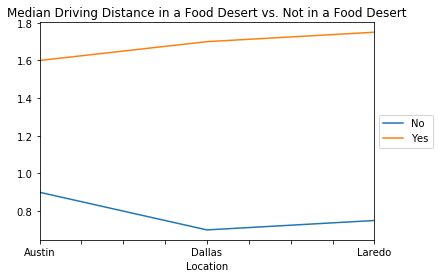

In [42]:
desert_drive.unstack().plot(title = "Median Driving Distance in a Food Desert vs. Not in a Food Desert")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

[]

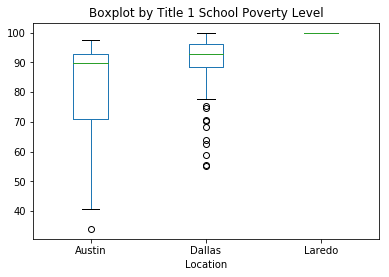

In [41]:
# Poverty level spread

df.boxplot("Percent in Poverty", by="Location", patch_artist = False, grid = False)
plt.suptitle("")
plt.title('Boxplot by Title 1 School Poverty Level')

plt.plot()

In [18]:
# Pulling poverty percentage into its own array 

poverty_level = df["Percent in Poverty"]

In [239]:
# Just grouping by location and calling median gives us medians for all the numerical values

df.groupby("Location").median()

,Bus Distance (miles),Driving Distance (miles),Percent in Poverty,Walking Distance (miles),Zip Code
Location,,,,,
Austin,1.45,1.3,89.765,NaN,78744.0
Dallas,1.30,1.2,92.930,1.1,75217.0
Laredo,NaN,0.9,100.000,NaN,NaN


# For future study: grouping by zip code

In [269]:
# Forty of Dallas' 140 Title 1 schools are in four zip codes -- about 29%

40/140

0.2857142857142857

In [274]:
# Just looking quickly at zip codes in Dallas and Austin and their corresponding driving distances to nearest store,
# our worst five zips in terms of number of schools doesn't line up with the worst drives. Without checking,
# my guess is that the worst zips below are ones that have few schools, which indicates a smaller population
# and thus a smaller number of stores needed, which increases the distance. I could check to see if there's
# an inverse correlation between number of schools in a zip code and driving distance

# Three of the four Dallas school worst zip codes have a median driving distance of 1.7 miles and the other is 
# 0.75. The worst Austin zip code has a median driving distance of 1.65 miles. 

df.groupby(["Location", "Zip Code"])["Driving Distance (miles)"].median().sort_values(ascending = False)

Location  Zip Code
Dallas    75234.0     3.50
Austin    78724.0     3.25
          78749.0     3.20
Dallas    75241.0     3.15
          75006.0     2.50
          75223.0     2.45
          75230.0     1.85
          75233.0     1.80
Austin    78745.0     1.80
Dallas    75217.0     1.70
          75227.0     1.70
          75216.0     1.70
          75244.0     1.65
Austin    78752.0     1.60
Dallas    75254.0     1.60
Austin    78753.0     1.50
Dallas    75232.0     1.50
          75215.0     1.45
Austin    78741.0     1.40
Dallas    75210.0     1.40
          75238.0     1.40
          75203.0     1.35
          75218.0     1.30
Austin    78721.0     1.30
Dallas    75214.0     1.30
Austin    78723.0     1.30
          78704.0     1.25
          78744.0     1.25
Dallas    75219.0     1.25
          75228.0     1.20
          75205.0     1.20
Austin    78758.0     1.20
          78702.0     1.20
Dallas    75209.0     1.15
          75235.0     1.10
          75159.0     1.10
Austin   

In [275]:
# Four of our five worst performing zips are above the median driving distance for their location

df.groupby("Location")["Driving Distance (miles)"].median()

Location
Austin    1.3
Dallas    1.2
Laredo    0.9
Name: Driving Distance (miles), dtype: float64

In [290]:
# Getting worst zip codes in Dallas and Austin

worst_zips = df.groupby(["Location", "Zip Code"]).agg({"School Name": "size", 
                                                       "Driving Distance (miles)": "median"}).sort_values(by = "School Name", 
                                                                              ascending = False)

worst_zips.rename(columns = {"Driving Distance (miles)": "Median Driving Distance", 
                             "School Name": "Number of Schools"}, inplace = True)

worst_zips.head(5)

Number of Schools  Median Driving Distance
Location Zip Code                                            
Dallas   75217.0                  16                     1.70
         75211.0                  14                     0.75
         75216.0                  11                     1.70
         75227.0                   9                     1.70
Austin   78744.0                   8                     1.25

In [383]:
# Food deserts within our worst five zip codes ('worst' defined as having the greatest number of Title 1 schools)

pd.crosstab(worst_df["Zip Code"], worst_df["Food Desert"])

Food Desert,No,Yes
Zip Code,,
75211.0,12,2
75216.0,2,9
75217.0,2,14
75227.0,3,6
78744.0,3,5


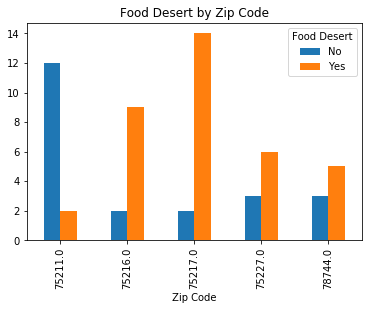

In [391]:
# Visually, it's easy to see that 75217 is our worst performer, while 75211 is our best

pd.crosstab(worst_df["Zip Code"], worst_df["Food Desert"]).plot(kind = 'bar', 
                                                               title = 'Food Desert by Zip Code')

In [396]:
# Summary statistics for the zip codes not including Laredo

worst_df.describe()

,Zip Code,Driving Distance,Percent in Poverty
count,58.000000,58.000000,58.000000
mean,75703.396552,1.518966,91.370345
std,1226.873890,1.042678,10.241433
min,75211.000000,0.100000,42.680000
25%,75216.000000,0.800000,90.852500
50%,75217.000000,1.400000,94.455000
75%,75227.000000,1.900000,96.352500
max,78744.000000,5.900000,99.430000


In [399]:
# Summary statistics by city for driving distance and percent in poverty
# The standard deviation tells about the spread -- Laredo has the largest spread in driving distance
# and Austin has the largest spread in poverty

df.groupby("Location")[['Driving Distance (miles)', 'Percent in Poverty']].describe()

Driving Distance (miles)                                            \
                            count   mean       std   min    25%  50%    75%   
Location                                                                      
Austin                       60.0  1.435  0.760648  0.20  1.000  1.3  1.800   
Dallas                      140.0  1.440  0.984835  0.10  0.800  1.2  1.800   
Laredo                       20.0  1.548  2.197936  0.06  0.675  0.9  1.125   

              Percent in Poverty                                           \
          max              count        mean        std     min       25%   
Location                                                                    
Austin    3.9               60.0   80.918500  17.031332   33.93   71.0175   
Dallas    6.1              140.0   90.397429   8.748154   55.20   88.2700   
Laredo    8.0               20.0  100.000000   0.000000  100.00  100.0000   

                                     
              50%       75%     max  
Location                             
Austin     89.765   92.8600   97.48  
Dallas     92.930   96.1425  100.00  
Laredo    100.000  100.0000  100.00

In [422]:
# After adding Laredo's zips to the dataframe, I re-ran the zip codes by number of Title 1 schools within each

df_ZipCodes = df.groupby("Zip Code").size().sort_values(ascending = False)

In [428]:
# Top two are Dallas, followed by Laredo, Dallas, Dallas, Austin

worst = df_ZipCodes.head(10)
worst

Zip Code
75217.0    16
75211.0    14
78040.0    13
75216.0    11
75227.0     9
78744.0     8
75229.0     7
78702.0     7
75228.0     6
75208.0     6
dtype: int64

In [459]:
# I wanted to cross tabulate by zip code and food desert status.
# Finding the zip codes with the most schools in them requires a margin so that the total can be captured
# and they can be sorted by which has the most total schools

# bottom 5 actually ended up being the bottom 6 so that Austin would be represented

bottom5 = pd.crosstab(df["Zip Code"], df["Food Desert"], margins = True).sort_values("All", ascending = False).head(7)

In [460]:
bottom5

Food Desert,No,Yes,All
Zip Code,,,
All,92,128,220
75217.0,2,14,16
75211.0,12,2,14
78040.0,10,3,13
75216.0,2,9,11
75227.0,3,6,9
78744.0,3,5,8


In [461]:
bottom5 = {
    "Zip Code": ['Dallas 75217', 'Dallas 75211', 'Laredo 78040', 'Dallas 75216', 'Dallas 75227', 'Austin 78744'],
    "No": [2, 12, 10, 2, 3, 3], "Yes": [14, 2, 3, 9, 6, 5]}

In [470]:
bottom5df = pd.DataFrame(bottom5)
bottom5df.count()

Zip Code    6
No          6
Yes         6
dtype: int64

In [472]:
bottom5df.set_index(['Zip Code'], inplace = True)

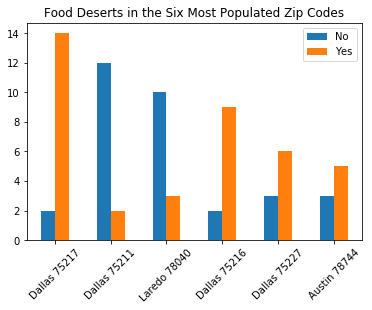

In [478]:
# The lines after bottom5df.plot... 
# are to get rid of the x-axis label that says "Zip Code"

bottom5df.plot(kind = 'bar', rot = 45, title = 'Food Deserts in the Six Most Populated Zip Codes')
ax1 = plt.axes()
x_axis = ax1.xaxis
x_axis.set_label_text('')
x_axis.label.set_visible(False)
plt.show()

In [ ]:
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [21]:
df.head(2)

,Bus Distance (miles),Closest Store,Driving Distance (miles),Location,Percent in Poverty,Poverty Groups,School Name,Store Address,Walking Distance (miles),Zip Code,Food Desert
0,1.4,Fiesta Mart,1.4,Dallas,97.13,90-100,William M Anderson Elementary,"10121 E Lake June Rd, Dallas, TX 75217",1.2,75217.0,Yes
1,0.9,Supermercado Monterrey,0.9,Dallas,96.33,90-100,Arcadia Park Elementary School,"5306 W Davis St, Dallas, TX 75211",0.9,75211.0,No
